# Acceleration of Convergence


## Aitken’s $\Delta^2$ Method

Assume that $\{c_n\}_{n=0}^{\infty}$ converges to a point $c$ linearly. Since the rate of convergence is linear,
\begin{align*}
\frac{c_{n+1} - c}{c_{n} - c} \approx \frac{c_{n+2} - c}{c_{n+1} - c}.
\end{align*}
It follows that,

\begin{align*}
(c_{n+1} - c)^2 \approx (c_{n+2} - c)(c_{n} - c).
\end{align*}

Expanding both sides,
\begin{align*}
& \quad c_{n+1}^2 -2 c_{n+1}c + c^2 \approx c_{n}c_{n+2} - (c_{n} + c_{n+2})c + c^2\\
\Rightarrow & \quad  (c_{n+2} -2c_{n+1} + c_{n})c \approx c_{n}c_{n+2} - c_{n+1}^2\\
\Rightarrow & \quad  c \approx \frac{c_{n}c_{n+2} - c_{n+1}^2}{(c_{n+2} -2c_{n+1} + c_{n})}.
\end{align*}
Therefore,
\begin{align*}
c & \approx \frac{c_{n}c_{n+2} - c_{n+1}^2}{(c_{n+2} -2c_{n+1} + c_{n})}\\
& = \frac{c_{n}c_{n+2} - c_{n+1}^2 +2c_{n} c_{n+1} + c_{n}^2 - 2c_{n} c_{n+1}- c_{n}^2}{(c_{n+2} -2c_{n+1} + c_{n})}\\
& = \frac{(c_{n}c_{n+2} - 2c_{n} c_{n+1} + c_{n}^2) - (c_{n+1}^2 -2c_{n} c_{n+1} + c_{n}^2)}
{(c_{n+2} -2c_{n+1} + c_{n})}\\
& = \frac{c_{n}(c_{n+2} - 2 c_{n+1} + c_{n}) - (c_{n+1}^2 -2c_{n} c_{n+1} + c_{n}^2)}{(c_{n+2} -2c_{n+1} + c_{n})}\\
& = c_{n} - \frac{(c_{n+1} - c_{n})^2}{(c_{n+2} -2c_{n+1} + c_{n})}
\end{align*}

<div class="alert alert-block alert-success">
    
* **Forward difference:** $\Delta c_{n} = c_{n+1} - c_{n}$
    
* **Backward difference:** $\nabla c_{n} = c_{n} - c_{n-1}$

</div>

\begin{align*}
c \approx c_{n} - \frac{(\Delta c_{n})^2}{\Delta^2 c_{n}}
\end{align*}

::::{tab-set}

:::{tab-item} Python Code
```python
import pandas as pd 
import numpy as np

def Aitken_method(f, x0, TOL = 1e-4, Nmax = 100):
    '''
    Parameters
    ----------
    f : function
        DESCRIPTION.
    x0 : float
        DESCRIPTION. Initial estimate
    TOL : TYPE, optional
        DESCRIPTION. Tolerance (epsilon). The default is 1e-4.
    Nmax : Int, optional
        DESCRIPTION. Maximum number of iterations. The default is 100.

    Returns
    -------
    a dataframe

    '''
    xn = []
    xn.append(x0)
    En = [0]
    for n in range(0, Nmax-1):
        x1 = f(x0)
        x2 = f(x1)
        
        denominator = (x2 - x1) - (x1 - x0)
        if abs(denominator) < 10e-16:
            print('Denominator is too small')
            break
        
        newx = x2 - ( (x2 - x1)**2 ) / denominator
        xn.append(newx)
        
        if abs(newx - x2) < TOL:
            break
        
        x0 = newx
        
    En.extend(np.diff(xn))
    return pd.DataFrame({'xn': xn, 'En': En})
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [xn, En] = Aitken_method(f, x0, TOL, Nmax)
%{
Parameters
----------
f : function
    DESCRIPTION.
x0 : float
    DESCRIPTION. Initial estimate
TOL : TYPE, optional
    DESCRIPTION. Tolerance (epsilon). The default is 1e-4.
Nmax : Int, optional
    DESCRIPTION. Maximum number of iterations. The default is 100.

Returns
-------
a dataframe

Example
f =@(x) (1 - 0.5*x*x)
x0 = 1
%}

switch nargin
    case 3
        Nmax = 100;
    case 2
        TOL = 1e-4; Nmax = 100;
end

xn = zeros(Nmax, 1);
xn(1) = x0;
En = zeros(Nmax, 1);
En(1) = 0;
for n = 2:(Nmax-1)
    % x1
    x1 = f(x0);
    %
    x2 = f(x1);
    denominator = (x2 - x1) - (x1 - x0);

    if abs(denominator) < 10e-16
        disp('Denominator is too small')
        break
    end

    newx = x2 - ( (x2 - x1)^2 ) / denominator;

    En(n) = abs(newx - x2);
    xn(n) = newx;
    if abs(newx - x2) < TOL
        xn = xn(1:n);
        En = En(1:n);
        break
    end

    x0 = newx; 
end
```
:::

::::

<font color='Blue'><b>Example</b></font>: $\{c_n\}_{n=0}^{\infty}$ generated using $x_{n+1} = (1 - \frac{1}{2} x_{n}^2)$ converges to a point $0.7320508075688773$ linearly. Try the above algorithm using $x_{0} = 1$.

<font color='Green'><b>Solution</b></font>: We have

In [1]:
# This part is used for producing tables and figures
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

In [2]:
from hd_RootFinding_Algorithms import Aitken_method
import numpy as np
f = lambda x: (1 - 0.5*x*x)

# Aitken’s Method
data = Aitken_method(f, x0 = 1)
display(data.style.format({'fxn': "{:.4e}"}))
hd.it_method_plot(data, title = """Aitken’s Method""", ycol = 'En', ylabel = 'En)', color = 'OrangeRed')

,xn,En
0,1.000000,0.000000
1,0.714286,-0.285714
2,0.731985,0.017699
3,0.732051,0.000066


## Steffensen’s method

We can use Aitken’s $\Delta^2$ Method for finding fixed points and then increase the rate of convergence from linear to quadratic. This procedure is known as Steffensen's method.

<font color='Blue'><b>Example</b></font>: Find a root of the following polynomial using both the fixed-point method and Steffensen's Method.

\begin{align*}
f(x)=x - \sqrt{x}.
\end{align*}

<font color='Green'><b>Solution</b></font>: We can reform $f(x) = 0$ to $x = g(x)$. That is

\begin{align*}
g(x)=\sqrt{x}.
\end{align*}

Let's try this first using the fixed-point method.

In [3]:
g = lambda x : np.sqrt(x)
from hd_RootFinding_Algorithms import Fixed_Point
data = Fixed_Point(g = g, x0 = .5, TOL=1e-4, Nmax=20)
display(data.style.format({'En': "{:.4e}"}))

,xn,En
0,0.500000,5.0000e-01
1,0.707107,2.0711e-01
2,0.840896,1.3379e-01
3,0.917004,7.6108e-02
4,0.957603,4.0599e-02
5,0.978572,2.0969e-02
6,0.989228,1.0656e-02
7,0.994599,5.3714e-03
8,0.997296,2.6966e-03
9,0.998647,1.3511e-03


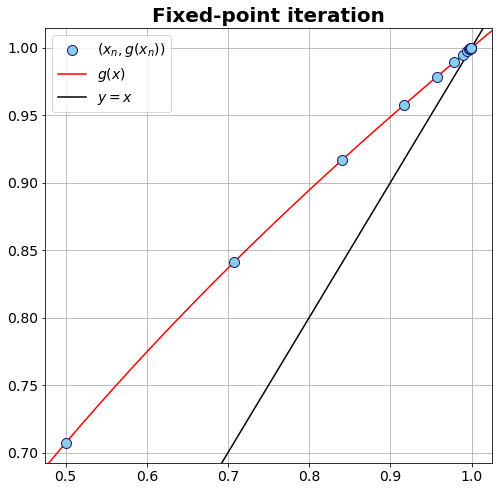

In [4]:
import matplotlib.pyplot as plt

fontsize = 14
Fig_Params = ['legend.fontsize','axes.labelsize','axes.titlesize','xtick.labelsize','ytick.labelsize']
Fig_Params = dict(zip(Fig_Params, len(Fig_Params)*[fontsize]))
plt.rcParams.update(Fig_Params)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
_ = ax.scatter(data.xn, g(data.xn), s= 100, facecolors='SkyBlue',
               edgecolors='MidnightBlue', label = r'$(x_{n}, g(x_{n}))$', zorder = 3)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1])
y = g(x)
_ = ax.plot(x, g(x), 'r', label = r'$g(x)$')
_ = ax.plot(x, x, 'k', label = r'$y = x$')
_ = ax.legend()
_ = ax.set_xlim(xlim)
_ = ax.set_ylim(ylim)
_ = ax.yaxis.grid()
_ = ax.xaxis.grid(True, which='major')
_ = ax.set_title('Fixed-point iteration', fontsize = 20, weight = 'bold')

Furthermore, using Steffensen's method:

In [5]:
data = Aitken_method(f = g, x0 = .5)
display(data.style.format({'En': "{:.4e}"}))

,xn,En
0,0.500000,0.0000e+00
1,1.085037,5.8504e-01
2,1.000808,-8.4228e-02
3,1.000000,-8.0815e-04
4,1.000000,-8.1563e-08


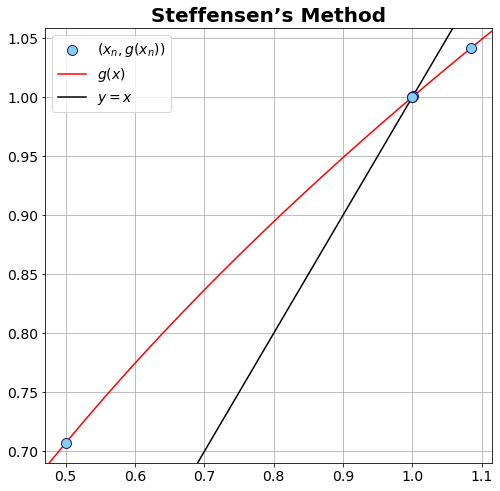

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
_ = ax.scatter(data.xn, g(data.xn), s= 100, facecolors='SkyBlue',
               edgecolors='MidnightBlue', label = r'$(x_{n}, g(x_{n}))$', zorder = 3)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1])
y = g(x)
_ = ax.plot(x, g(x), 'r', label = r'$g(x)$')
_ = ax.plot(x, x, 'k', label = r'$y = x$')
_ = ax.legend()
_ = ax.set_xlim(xlim)
_ = ax.set_ylim(ylim)
_ = ax.yaxis.grid()
_ = ax.xaxis.grid(True, which='major')
_ = ax.set_title('Steffensen’s Method', fontsize = 20, weight = 'bold')

***
**References:**
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Süli, Endre, and David F. Mayers. An introduction to numerical analysis. Cambridge university press, 2003.
1. Argyros, I. K., M. A. Hernández-Verón, and M. J. Rubio. ["On the Convergence of Secant-Like Methods."](https://link.springer.com/chapter/10.1007/978-3-030-15242-0_5) Current Trends in Mathematical Analysis and Its Interdisciplinary Applications. Birkhäuser, Cham, 2019. 141-183.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
***